In [ ]:
"""
ДЗ 1. Блок 1. Введение в теорию вероятностей. 0.1 курс на Stepik. Метод МонтеКарло.

ч.2 .
"""

In [ ]:
# pylint: disable=unused-import

# доп import чтоб линтеры проходили
# from typing import List, Optional, Tuple, Union
# from typing import Tuple

import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# игральный кубик
np.random.randint(1, 7)

3

In [9]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
# воспроизводимость результатов расчёта
np.random.seed(321)
# перемешали данные
x_data = [1, 2, 3, 4]
np.random.shuffle(x_data)
x_data

[2, 4, 3, 1]

In [16]:
# выборка с повторением/без повторения
# np.random.choice([1,2,3,4,5], size=10, replace=False)
np.random.choice([1, 2, 3, 4, 5], size=10, replace=True)

array([3, 5, 2, 4, 3, 3, 2, 2, 1, 5])

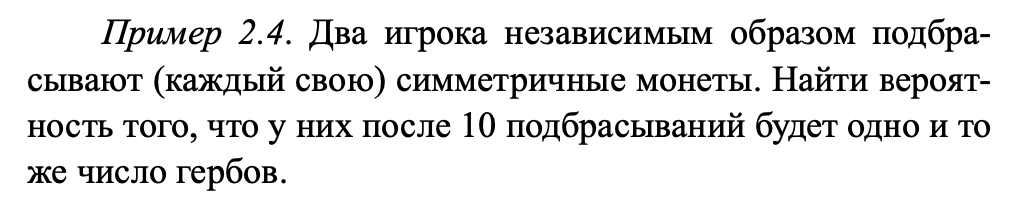

In [ ]:
n_param = 10**6  # Объем испытаний
m_param = 0  # Счетчик числа благоприятствующих случаев

np.random.seed(312)  # Начальная установка датчика случайных чисел
# Данная команда используется для воспроизводимости результата моделирования

for i in range(0, n_param):  # Цикл; счетчик цикла i (от 0 до n-1) - номер опыта
    # В ячейках a и b - результат десяти подбрасываний
    # (массивы, содержащие нули (выпала решка) и единицы (выпал герб))
    a_param = np.random.choice([0, 1], p=[0.5, 0.5], size=10)
    b_param = np.random.choice([0, 1], p=[0.5, 0.5], size=10)

    if sum(a_param) == sum(b_param):  # Если число гербов одинаковое
        m_param += 1  # Увеличить на 1 значение счетчика

# Для оценки вероятности берется относительная частота события
p_param = m_param / n_param
print(p_param)  # Вывод вероятности

0.17546


In [20]:
# случайным образом возьми 1 элемент
elem = pd.Series([0, 1]).sample(1).values[0]
elem

1

In [ ]:
# подбрасывание монеты

# два исхода биномиальное распр, дсв
np.random.binomial(1, 0.5)

1

In [ ]:
# подбросили 3 раза монетку
np.random.binomial(1, 0.5, size=3)

array([1, 0, 0])

In [27]:
# подбросили 3 раза монетку
result = []
for _ in range(3):
    result.append(np.random.binomial(1, 0.5))

result

[1, 1, 1]

In [31]:
# подбросили 3 раза монетку
elem = [np.random.binomial(1, 0.5) for _ in range(3)]
elem

[0, 1, 1]

In [55]:
# создаем функцию подбрасывания монетки


def coin_toss() -> int:
    """coin_toss."""
    # return pd.Series([0, 1]).sample(1).values[0]
    return int(pd.Series([0, 1]).sample(1).values[0])

In [49]:
# pylint: disable=unsubscriptable-object


# создаем функцию подбрасывания монетки
def coin_toss2() -> int:
    """coin_toss 2."""
    return np.random.binomial(1, 0.5)

In [59]:
coin_toss()

1

In [54]:
coin_toss2()

0

In [37]:
result = []
for _ in range(3):
    result.append(coin_toss())

result

[1, 0, 0]

In [ ]:
elem = [coin_toss() for _ in range(3)]
elem

[0, 1, 1]

In [48]:
elem = [coin_toss2() for _ in range(3)]
elem

[0, 1, 0]

<Axes: >

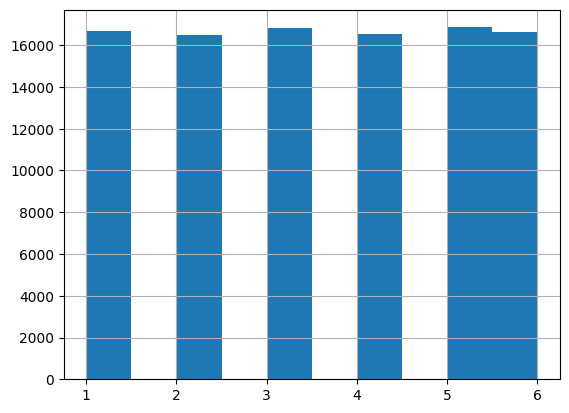

In [ ]:
# закон больших чисел, в данном случае мы увеличиваем выборку
# если мы повторяем один и тот же эксперимент много раз и записываем результат
# каждого раза,
# то среднее значение результатов будет приближаться мат. ожиданию, то есть
# к истинному(теоретическому) среднему
# монетка идеальный пример
# ДСВ распределение
pd.Series(np.random.randint(1, 7, size=100000)).hist()

<Axes: >

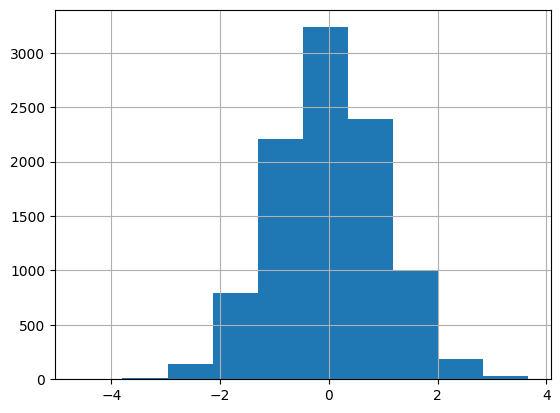

In [61]:
pd.Series(np.random.normal(size=10000)).hist()

# """
#     Code by Tae-Hwan Hung(@graykode)
#     https://en.wikipedia.org/wiki/Normal_distribution
# """
# import numpy as np
# from matplotlib import pyplot as plt

# def normal(x, n):
#     u = x.mean()
#     s = x.std()

#     # normalization
#     x = (x - u) / s

#     # divide [x.min(), x.max()] by n
#     x = np.linspace(x.min(), x.max(), n)

#     a = ((x - 0) ** 2) / (2 * (1 ** 2))
#     y = 1 / (s * np.sqrt(2 * np.pi)) * np.exp(-a)

#     return x, y, x.mean(), x.std()

# x = np.arange(-100, 100) # define range of x
# x, y, u, s = normal(x, 10000)

# plt.plot(x, y, label=r'$\mu=%.2f,\ \sigma=%.2f$' % (u, s))
# plt.legend()
# plt.savefig('graph/normal.png')
# plt.show()

<Axes: >

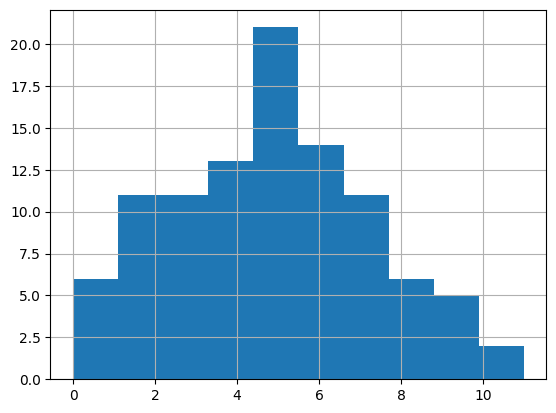

In [62]:
# Распределение Бернулли

# моделирование звонков, в срднем 5 в час, всего 100 звонков
pd.Series(np.random.poisson(5, size=100)).hist()

<Axes: >

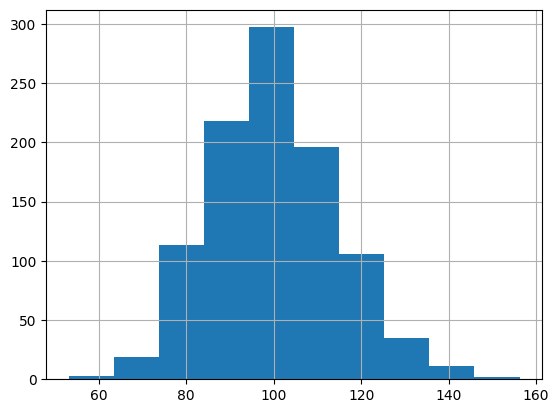

In [ ]:
# цпт
# в большом количестве независимых наблюдений МО будет иметь нормальное распределение.

# Почему это важно?

# ЦПТ позволяет нам делать выводы о популяции, даже если мы не знаем всех ее данных.
# Например, # если мы хотим узнать средний рост людей в стране, мы можем взять
# случайную выборку и измерить рост людей в этой выборке.
# Благодаря центральной предельной теореме мы знаем,
# что средний рост в выборке будет приближаться к среднему росту в стране,
# и мы можем использовать это, чтобы сделать выводы о всей популяции.

pd.Series(np.random.chisquare(100, size=1000)).hist()

<Axes: >

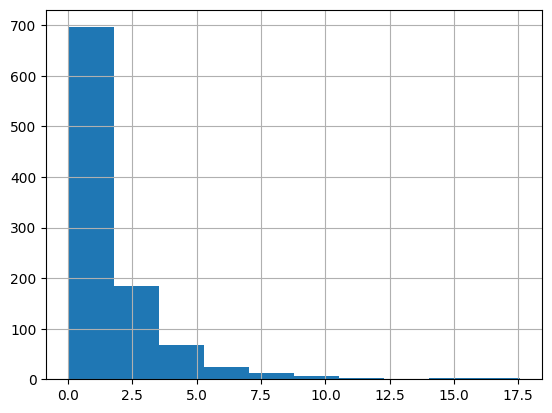

In [64]:
# жирнохвостовое
pd.Series(np.random.lognormal(size=1000)).hist()

<Axes: >

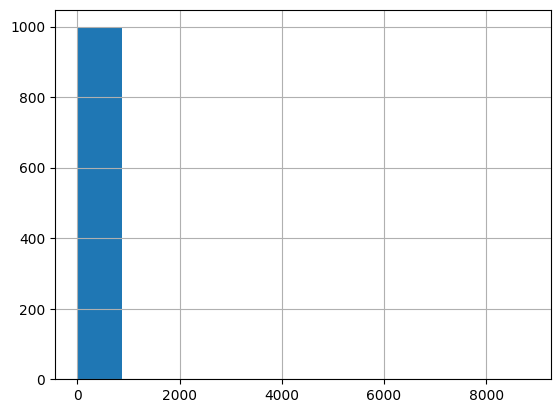

In [65]:
# жирный хвост - 2
pd.Series(np.random.pareto(1, size=1000)).hist()

<Axes: ylabel='Probability'>

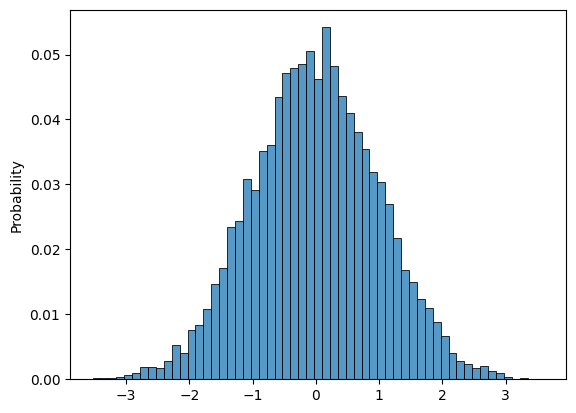

In [67]:
sns.histplot(np.random.normal(size=10000), stat="probability")

<Axes: ylabel='Density'>

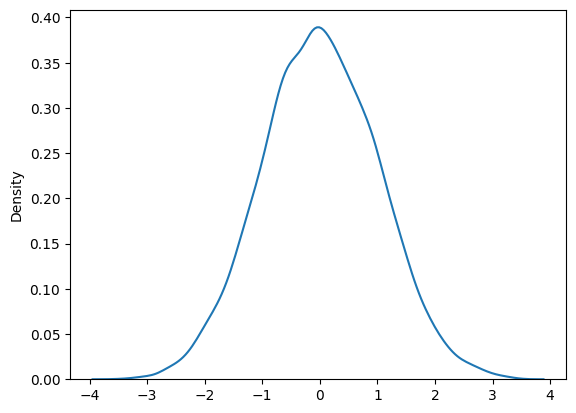

In [68]:
# KDE - функция которая апроксимирует гистограмму
sns.kdeplot(np.random.normal(size=10000))

<Axes: ylabel='Proportion'>

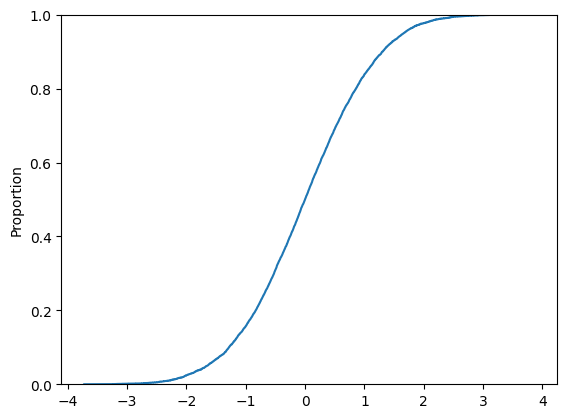

In [69]:
sns.ecdfplot(np.random.normal(size=10000))